In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df_lending_data = pd.read_csv("../Resources/lending_data.csv")

# Review the DataFrame
df_lending_data

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


In [3]:
df_lending_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [4]:
df_lending_data["loan_status"].value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [5]:
# Separate the data into labels and features
X = df_lending_data.drop(columns = "loan_status")

# Separate the y variable, the labels
y = df_lending_data["loan_status"]

# Separate the X variable, the features
X.shape

(77536, 7)

In [6]:
# Review the y variable Series
# y.head()
y[:5]


0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [7]:
# Review the X variable DataFrame
X 

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [8]:
# Check the balance of our target values
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [9]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =1, stratify =y)


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [10]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifiermodel1 = LogisticRegression(random_state = 1)

# Fit the model using training data
classifiermodel1.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [11]:
# Make a prediction using the training and testing data
# y_pred = classifiermodel1.predict(X_test)
predictions1 = classifiermodel1.predict(X_test)

print(f"Training Data Score: {classifiermodel1.score(X_train, y_train)}")
print(f"Testing Data Score: {classifiermodel1.score(X_test, y_test)}")

Training Data Score: 0.9914878250103177
Testing Data Score: 0.9924164259182832


In [12]:
# Review the results side by side
results = pd.DataFrame({"prediction" : predictions1, "Actual" : y_test}).reset_index(drop = True)
results.head()

,prediction,Actual
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [13]:
# Print the balanced_accuracy score of the model
print(f"balanced_accuracy_score: {balanced_accuracy_score(y_test, predictions1)}")

balanced_accuracy_score: 0.9442676901753825


In [14]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, predictions1)

array([[18679,    80],
       [   67,   558]], dtype=int64)

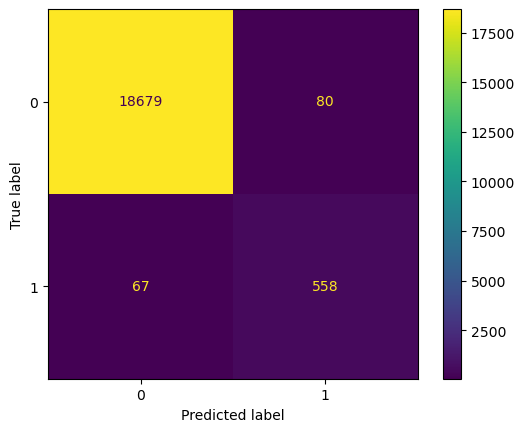

In [15]:
# view confusionmatrix display
# follow documentation to generate ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions1)
disp = confusion_matrix(y_test, predictions1, labels = classifiermodel1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classifiermodel1.classes_)

disp.plot()

plt.show()

In [16]:
# Print the classification report for the model
# target_names = ["Class Purple", "Class Yellow"]

target_names = ["healthy", "high_risk"]
print(classification_report(y_test, predictions1, target_names = target_names))

              precision    recall  f1-score   support

     healthy       1.00      1.00      1.00     18759
   high_risk       0.87      0.89      0.88       625

    accuracy                           0.99     19384
   macro avg       0.94      0.94      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The Logistic Regression model trained on the actual data gives a 94.4% accuracy of predicting the two labels.  This model is very good in predicting the healthy loans, as the precision, recall and  f1-score is 1.00, i.e. 100%. However, the model's performance in predicting the high_risk loans can be improved, as it predicted 87% of the precision and recall of 89%. It shows that model is not able to classify high risk loans than healthy loans.

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [17]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler


# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
random_oversampler_model = RandomOverSampler(random_state = 1)

# Fit the original training data to the random_oversampler model
X_resample, y_resample = random_oversampler_model.fit_resample(X_train, y_train)

In [18]:
# Count the distinct values of the resampled labels data
y_resample.value_counts()

0    56277
1    56277
Name: loan_status, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [19]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifiermodel2 = LogisticRegression(random_state =1)

# Fit the model using the resampled training data
classifiermodel2.fit(X_resample, y_resample)

# Make a prediction using the testing data
predictions2 = classifiermodel2.predict(X_test)

In [20]:
results1 = pd.DataFrame({"prediction" : predictions2, "Actual" : y_test}).reset_index(drop = True)
results1.head()

,prediction,Actual
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [21]:
# Print the balanced_accuracy score of the model 
balanced_accuracy_score(y_test, predictions2)

0.9959744975744975

In [22]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, predictions2)

array([[18668,    91],
       [    2,   623]], dtype=int64)

In [23]:
# Print the classification report for the model
print(classification_report(y_test, predictions2, target_names = ["healthy", "high_risk"]))

              precision    recall  f1-score   support

     healthy       1.00      1.00      1.00     18759
   high_risk       0.87      1.00      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      1.00      0.96     19384
weighted avg       1.00      1.00      1.00     19384



### Step 4: Answer the following question

**Question:** How well does the logistic regression model,fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** Compared to the LogisticRegression model trained on the actual data, the LogisticRegression model trained with oversampled data gives the higher accuracy in predicting the 2 labels and gives higher recall score i.e.100% in predicting the high-risk loans in the dataset.